In [2]:
import scanpy as sc 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#adata = Annotated data matrix

adata = sc.read_visium("DD073R_A1_processed")
adata.var_names_make_unique()

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
adata

AnnData object with n_obs × n_vars = 1175 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [ ]:
#unstructured annotation

adata.uns['spatial']['DD73RA1_rep2']['images']['hires'].shape

(2000, 1815, 3)

In [12]:
adata.obsm['spatial'].shape

(1175, 2)

In [40]:
#observations

adata.obs

,in_tissue,array_row,array_col,thing,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,n_counts
AAACAGAGCGACTCCT-1,1,14,94,a,2265,7.725771,4567.0,8.426830,24.523757,33.873440,44.230348,59.054084,379.0,5.940171,8.298664,4553.0
AAACCGGGTAGGTACC-1,1,42,28,a,2418,7.791110,5088.0,8.534837,23.919025,31.741352,41.332547,56.721698,576.0,6.357842,11.320755,5011.0
AAACCGTTCGTCCAGG-1,1,52,42,a,2743,7.917172,6143.0,8.723231,25.297086,32.801563,42.064138,56.649845,548.0,6.308098,8.920722,6127.0
AAACTTGCAAACGTAT-1,1,45,19,a,2189,7.691657,6093.0,8.715060,38.634499,48.022321,57.557853,69.998359,573.0,6.352629,9.404235,6081.0
AAAGGCTCTCGCGCCG-1,1,55,55,a,5699,8.648221,17169.0,9.750919,21.550469,29.401829,38.225872,50.358204,1555.0,7.349874,9.057021,17116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTAGCAAATTCGA-1,1,22,42,a,1072,6.978214,1821.0,7.507690,26.633718,36.079077,48.709500,68.588688,97.0,4.584968,5.326744,1818.0
TTGTTCAGTGTGCTAC-1,1,24,64,a,2034,7.618251,4157.0,8.332789,24.585037,33.894636,44.479192,61.029589,350.0,5.860786,8.419533,4144.0
TTGTTTCACATCCAGG-1,1,58,42,a,4957,8.508758,20920.0,9.948508,48.723709,53.957935,59.756214,67.958891,3707.0,8.218248,17.719885,20871.0
TTGTTTCATTAGTCTA-1,1,60,30,a,2076,7.638680,4469.0,8.405144,27.769076,36.249720,45.938689,61.691654,493.0,6.202536,11.031551,4449.0


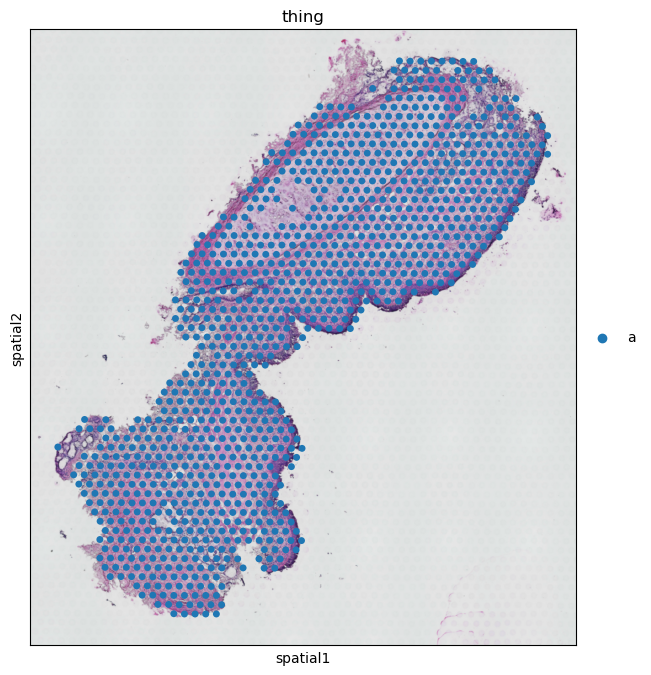

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.rcParams['figure.figsize'] = (8, 8)
sc.pl.spatial(adata, color='thing')

In [19]:
# Reading the data

adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

adata.obs

,in_tissue,array_row,array_col,thing,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACAGAGCGACTCCT-1,1,14,94,a,2265,7.725771,4567.0,8.426830,24.523757,33.873440,44.230348,59.054084,379.0,5.940171,8.298664
AAACAGGGTCTATATT-1,1,47,13,a,6792,8.823648,47816.0,10.775137,52.085076,58.927974,65.942362,73.142881,1505.0,7.317213,3.147482
AAACCGGGTAGGTACC-1,1,42,28,a,2418,7.791110,5088.0,8.534837,23.919025,31.741352,41.332547,56.721698,576.0,6.357842,11.320755
AAACCGTTCGTCCAGG-1,1,52,42,a,2743,7.917172,6143.0,8.723231,25.297086,32.801563,42.064138,56.649845,548.0,6.308098,8.920722
AAACTTGCAAACGTAT-1,1,45,19,a,2189,7.691657,6093.0,8.715060,38.634499,48.022321,57.557853,69.998359,573.0,6.352629,9.404235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTAGCAAATTCGA-1,1,22,42,a,1072,6.978214,1821.0,7.507690,26.633718,36.079077,48.709500,68.588688,97.0,4.584968,5.326744
TTGTTCAGTGTGCTAC-1,1,24,64,a,2034,7.618251,4157.0,8.332789,24.585037,33.894636,44.479192,61.029589,350.0,5.860786,8.419533
TTGTTTCACATCCAGG-1,1,58,42,a,4957,8.508758,20920.0,9.948508,48.723709,53.957935,59.756214,67.958891,3707.0,8.218248,17.719885
TTGTTTCATTAGTCTA-1,1,60,30,a,2076,7.638680,4469.0,8.405144,27.769076,36.249720,45.938689,61.691654,493.0,6.202536,11.031551


<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

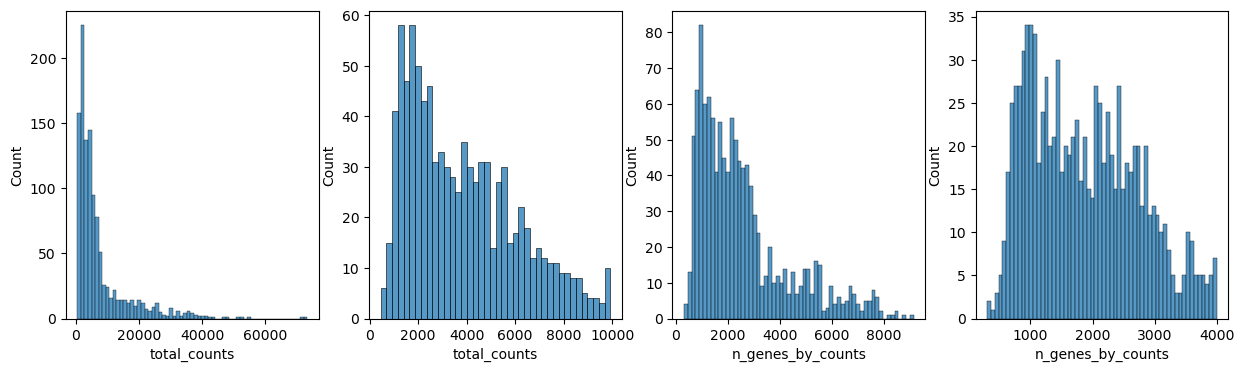

In [22]:
# QC and Preprocessing

fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(
    adata.obs["total_counts"][adata.obs["total_counts"] < 10000],
    kde=False,
    bins=40,
    ax=axs[1],
)
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(
    adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000],
    kde=False,
    bins=60,
    ax=axs[3],
)

In [25]:
sc.pp.filter_cells(adata, min_counts = 1000)
sc.pp.filter_cells(adata, max_counts=35000)

adata = adata[adata.obs["pct_counts_mt"] < 20].copy()
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)


#cells after MT filter: 1074


In [26]:
# normalization and scaling

sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [47]:
#Manifold embedding and clustering based on transcriptional similarity

sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(
    adata, key_added="clusters", flavor="igraph", directed=False, n_iterations=2)

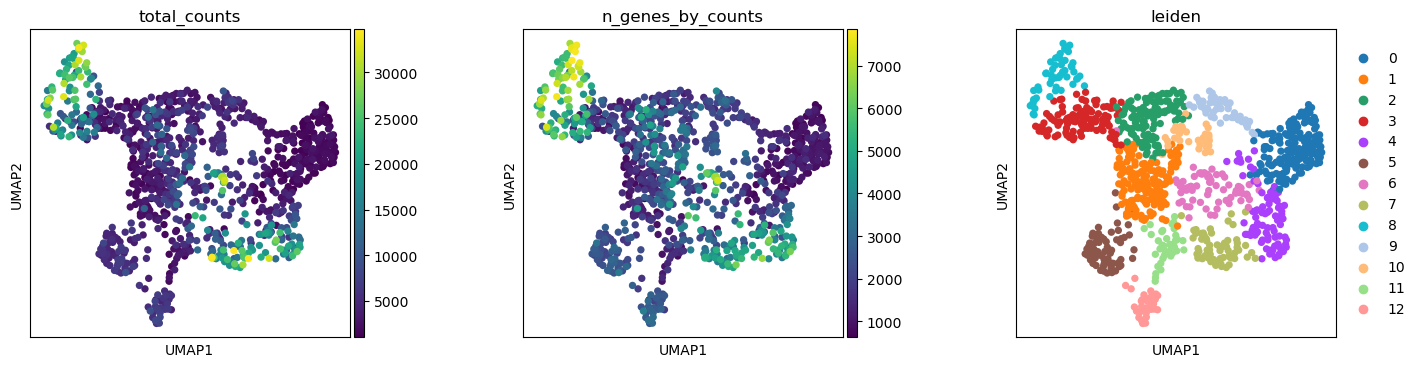

In [51]:
# Clustering and visualization

plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "leiden"], wspace=0.4)

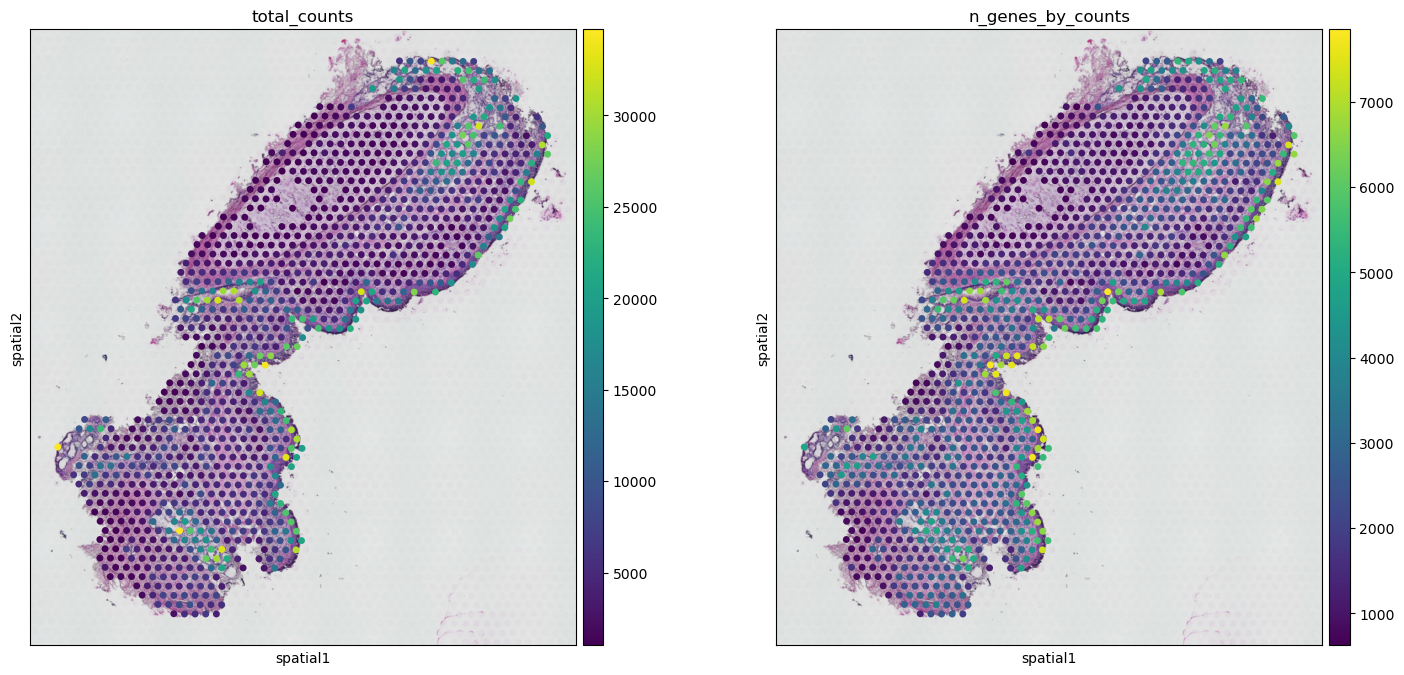

In [ ]:
# Visualization in spatial coordinates

plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

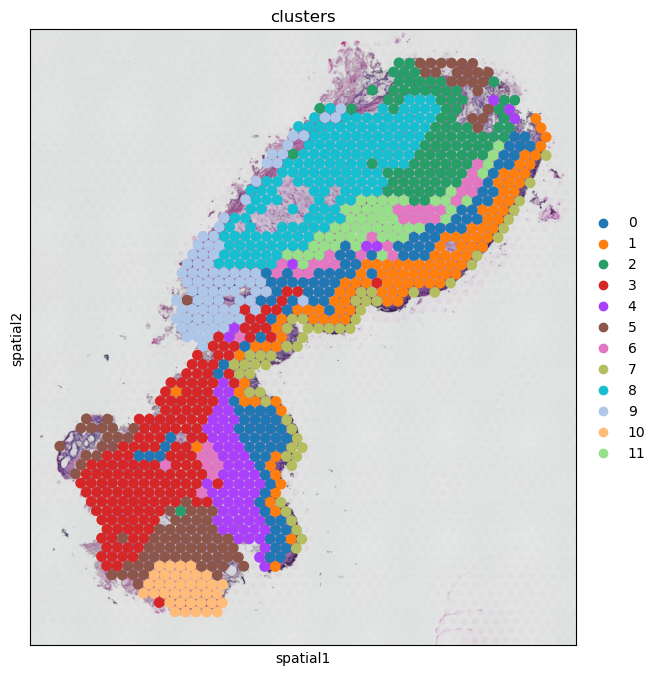

In [48]:
sc.pl.spatial(adata, img_key="hires", color="clusters", spot_size=40)

In [50]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/var/folders/bn/1bzdhml55wg120h25z1nn0lc0000gn/T/ipykernel_30954/1811805723.py:4: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


In [59]:
#ranking gene groups

sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

results = adata.uns['rank_genes_groups']
('0', '1', '2', '3', '4')

out = np.array([[0,0,0,0,0]])
for group in results['names'].dtype.names:
    out = np.vstack((out, np.vstack((results['names'][group],
                                     results['scores'][group],
                                     results['pvals_adj'][group],
                                     results['logfoldchanges'][group],
                                     np.array([group] * len(results['names'][group])).astype('object'))).T))



markers = pd.DataFrame(out[1:], columns = ['Gene', 'scores', 'pval_adj', 'lfc', 'cluster'])

markers = markers[(markers.pval_adj < 0.05) & (abs(markers.lfc) > 1)]


In [60]:
markers

,Gene,scores,pval_adj,lfc,cluster
0,CCN2,20.636814,0.0,4.647624,0
1,CYTL1,20.35181,0.0,6.61903,0
2,GPX3,19.607441,0.0,2.877072,0
3,PRELP,18.526175,0.0,3.309999,0
4,ECRG4,18.133488,0.0,5.102576,0
...,...,...,...,...,...
204975,CLU,-4.874753,0.000118,-1.260142,12
204976,BGN,-5.013032,0.000064,-1.901527,12
204978,APOD,-5.018225,0.000063,-1.258982,12
204982,SAT1,-5.521058,0.000005,-1.335783,12


categories: 0, 1, 2, etc.
var_group_labels: 9


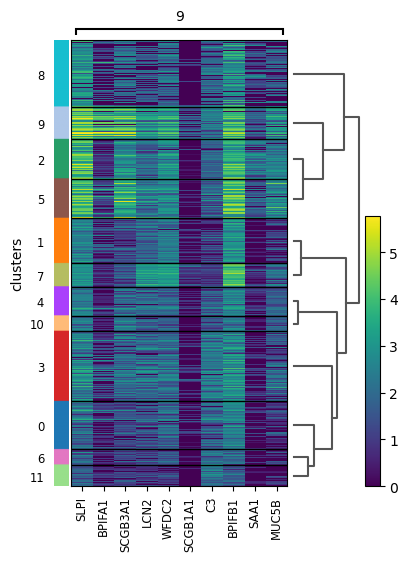

In [61]:
#cluster marker genes

sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="9", n_genes=10, groupby="clusters")

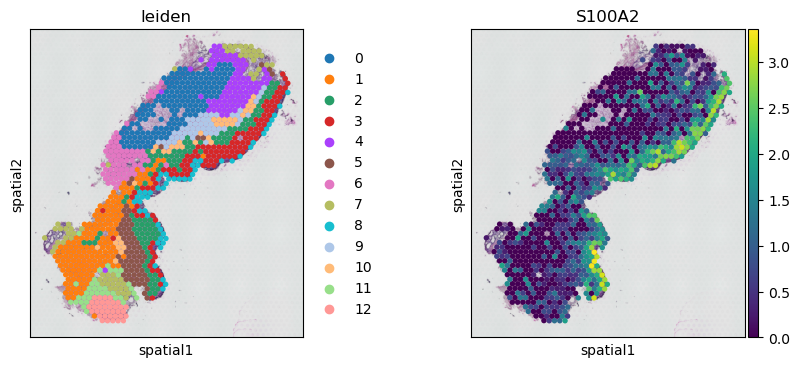

In [ ]:
sc.pl.spatial(adata, img_key="hires", color=["leiden", "S100A2"], spot_size=40)
plt.savefig("S100A2.png")
